# CONFIABILIDADE ESTRUTURAL TRABALHO PRÁTICO

**Aluno: Guilherme Jenovencio**


O trabalho consiste em gerar sinais pseudo randômicos a partir de funções PSD dadas, e desenvolver a análise usando estes sinais.

1. Gerar os sinais $X(t)$, um para cada função PSD. Discutir os critérios de partição e de seleção de $\phi_i$ (ângulo de defasagem). 

2. Determinar para cada PSD $m_o,m_2,m_4$ e calcular $f_o, f_p$ e $\alpha$.

3. Verificar a qualidade de $X(t)$ pela convergência de $E[X]$ e $E[X^2]$, conforme NP aumenta. Usar $[10^3,2\cdot10^3,5\cdot10^3,10^4]$ para NP, número de pontos gerados para $X(t)$.

4. Determinar para cada $X(t)$ gerado $E[X];E[X^2];E[X^3];E[X^4]$ e os coeficientes de variação, simetria e curtose.

5. Construir para cada $X(t)$ o seu histograma.

6. Plotar os pontos de $X(t)$ no gráfico de probabilidade. (amostras vs probabilidade acumulada). Utilizar a variável $Z(x) = \phi^{-1}(x)$ 

7. A partir de duas amostras geradas, $X(t)$ e $Y(t)$, usando duas PSD, verifique a hipótese, errada, que sejam de um mesmo processo, comparando para o nível de confiança de 5%, $E[X]$ e $E[Y]$ e $VAR[X]$ e $VAR[Y]$.

8. Discussão e conclusões sobre os resultados.

In [29]:
# Implementação das funções PSDs
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfinv, erf, ndtri
import scipy as sp
from scipy import stats
import sys

%matplotlib inline

#sys.path.append(r'C:\Users\Guilherme\Dropbox\POSMEC\Confiabilidade_Estrutural')
sys.path.append(r'C:\Users\jenovencio\Dropbox\POSMEC\Confiabilidade_Estrutural')
from PSDdata import *


psds = [PSD1(),PSD2(),PSD3(),PSD4(),PSD5(),PSD6()]


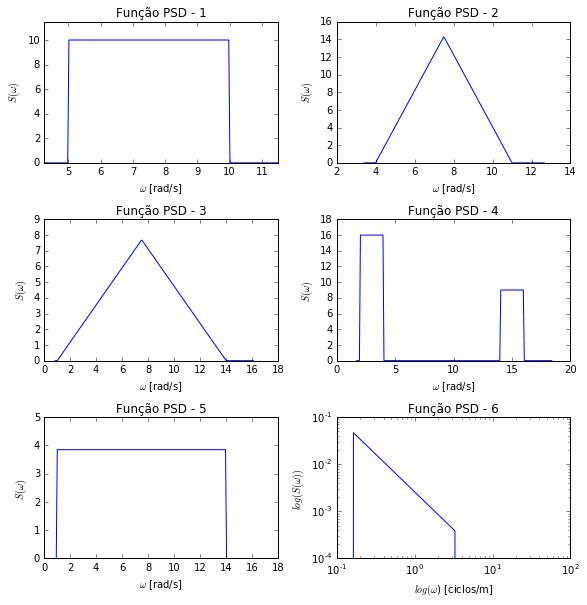

In [30]:
#teste
n=200
perc = 0.15 
y=[]
x=[]
for i, psd in enumerate(psds):
    init = psd.minimum - perc*psd.minimum
    end = psd.maximum + perc*psd.maximum
    xi = np.linspace(init,end,n)
    yval = psd.feval(xi)
#    if i==5:
#        init = np.log(psd.minimum) 
#        end = np.log(psd.maximum) 
#        xi = np.linspace(init,end,n)
#        yval = np.log(psd.feval(np.exp(xi)))
        


        
    x.append(xi)
    y.append(yval)

f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.25)
   
   
    
ax1.plot(x[0],y[0])    
ax1.set_ylabel('$S(\omega)$')  
ax1.set_xlabel('$\omega$ [rad/s]')  
ax1.set_title('Função PSD - 1')   
ax1.set_xlim(psds[0].minimum - perc*psds[0].minimum, psds[0].maximum + perc*psds[0].maximum)
ax1.set_ylim(0., psds[0].ymax+psds[0].ymax*perc)

ax2.plot(x[1],y[1])    
ax2.set_ylabel('$S(\omega)$')  
ax2.set_xlabel('$\omega$ [rad/s]')  
ax2.set_title('Função PSD - 2')    
ax2.set_ylim(0., 16)

ax3.plot(x[2],y[2])    
ax3.set_ylabel('$S(\omega)$')  
ax3.set_xlabel('$\omega$ [rad/s]')  
ax3.set_title('Função PSD - 3')   
ax3.set_ylim(0., 9.0)
    
ax4.plot(x[3],y[3])    
ax4.set_ylabel('$S(\omega)$ ')  
ax4.set_xlabel('$\omega$ [rad/s]')  
ax4.set_title('Função PSD - 4')   
ax4.set_ylim(0., 18.0)

ax5.plot(x[4],y[4])    
ax5.set_ylabel('$S(\omega)$ ')  
ax5.set_xlabel('$\omega$ [rad/s]')  
ax5.set_title('Função PSD - 5') 
ax5.set_ylim(0., 5)

ax6.plot(x[5],y[5])    
ax6.set_ylabel('$log( S(\omega))$ ')  
ax6.set_xlabel('$log( \omega$) [ciclos/m]')  
ax6.set_title('Função PSD - 6') 
ax6.set_xlim(0.1,100)
ax6.set_xscale("log", nonposx='clip')
ax6.set_yscale("log", nonposx='clip')

plt.show()
f.savefig("fig1.png", bbox_inches='tight')    

In [31]:
def splitint(psdmin, psdmax, n=25, s=1):
    ''' this function split the frenquencia domain in order to perform a 
    inverted Power Spectral Density
    '''
    # input:
    # n = 25 # number of intervals
    # s = seed number for generating random numbers
    np.random.seed(s) # seting random seed
    
    e = np.random.rand(n) # generating random vector [0,1] with n components
    ebar = sum(e)
    delta = (psdmax - psdmin)/ebar
    
    # calculating
    w = [float(psdmin)]
    wbar = []
    for i in range(1,n+1):
        deltaw = delta*e[i-1]
        wi = float(w[i-1])
        wi1 = wi + deltaw 
        wbari = np.sqrt(wi*wi1)
        w.append(float(wi1))
        wbar.append(float(wbari))
    
    return w, wbar

def generatephaseangle(n,s):
    ''' This function generates random phase angulo for inverted PSD
    '''
    np.random.seed(s) # seting random seed
    phi = np.random.rand(n)*2.0*np.pi # generating random vector [0,1] with n components
    return phi

def invPSD(psd,w,wbar):
    psd.wbar = wbar
    A = [] # amplitude
    for i,wi in enumerate(wbar):
        A.append(np.sqrt(psd.area(w[i],w[i+1])))
    
    psd.A = A
    return A

for i,psd in enumerate(psds):
    n = 25
     
    if psd.number == 4:
        w, wbar = splitint(psd.minimum, psd.max1, 13, i)    
        w2, wbar2 = splitint(psd.min2, psd.maximum, 12, i)    
        A = invPSD(psd,w,wbar)
        A2 = invPSD(psd,w2,wbar2)
        A.extend(A2)
        w.extend(w2)
        wbar.extend(wbar2)
        psd.A = A
        psd.wbar = wbar
    else:    
        w, wbar = splitint(psd.minimum, psd.maximum, n, i)    
        A = invPSD(psd,w,wbar)
    
    fmax = psd.maximum/(2*np.pi)
    fmin = psd.minimum/(2*np.pi)
    Tmin = 1.0/fmax
    Tmax = 1.0/fmin
    
    psd.fmax = fmax
    psd.fmim = fmin
    psd.Tmax = Tmax
    psd.Tmin = Tmin
        
    phi = generatephaseangle(n,3*i)
    psd.phi = phi
    deltat = Tmin/20.0
    NP = 20*Tmax/deltat
    if NP < 1.0E5:
        NP = 1.0E5
    
    t = np.linspace(0.0,deltat*NP,NP)
    X = np.zeros(NP)
    
    for j,wbari in enumerate(wbar):
        for k,time in enumerate(t):
            X[k] = X[k] + psd.A[j]*np.sin(psd.wbar[j]*time + phi[j])
            #X[k] =  X[k] + psd.A[j]*np.sin(psd.wbar[j]*time + phi[j])
    
    psd.X = X # write X(t) in psd class
    psd.time = t # write t in psd class
 

    
def mmoment(psd,m):
    ''' this function estimates de statistical moment of order m
    by evaluatian the psd function. It's use a trapz method by numpy
    '''
    n = 5000
    x = np.linspace(psd.minimum,psd.maximum,n)        
    yval = psd.feval(x)
    xm = x**m
    xmy = xm*yval
    mm = np.trapz(xmy,x)
    return mm


def Em(X,m,xc=0.0):
    ''' this function estimates de statistical moment for X variable of order m
    by evaluatian the psd function. It's use a trapz method by numpy
    '''
    n = len(X)
    X = np.array(X)-xc
    x = X**m
    E = sum(x)/n
    
    return E

def coefVar(X):
    # calculates the Coefficient of variation
    m = Em(X,1)
    v = Em(X,2,m)
    cv = v/m
    return cv

def coefSkewness(X):
    # calculates skewness coefficient
    m = Em(X,1)
    v = Em(X,2,m)
    e3 = Em(X,3,m)
    gamma = e3/(v**(3/2))
    return gamma
    
def coefKurt(X):
    # calculates Kurtosis coefficient
    m = Em(X,1)
    v = Em(X,2,m)
    e4 = Em(X,4,m)
    kurt = e4/(v**(2))
    return kurt
    
    
# question 2
for psd in psds:
    
    m0 = mmoment(psd,0)
    m2 = mmoment(psd,2)
    m4 = mmoment(psd,4)
    
    f0 = np.sqrt(m2/m0)
    fp = np.sqrt(m4/m2)
    alfa = f0/fp
    
    psd.m0 = m0
    psd.m2 = m2
    psd.m4 = m4
    psd.f0 = f0
    psd.fp = fp
    psd.alfa = alfa
   
 # question 4
    E1 = Em(psd.X,1)
    E2 = Em(psd.X,2)
    E3 = Em(psd.X,3)
    E4 = Em(psd.X,4)
    
    cv = coefVar(psd.X)
    skew = coefSkewness(psd.X)
    kurt = coefKurt(psd.X)
    Var = Em(psd.X,2,E1)
    
    psd.E1 = E1
    psd.E2 = E2
    psd.E3 = E3
    psd.E4 = E4
    psd.Var = Var
    
    psd.cv = cv
    psd.skew = skew
    psd.kurt = kurt
    
    
    
    
# sorting X
    psd.Xsort = np.sort(psd.X)
    
  
    
    
    print("|psd %i | m0 = %7.4f |  m2 = %8.3f | m4 = %f | f0 = %f | fp = %f | alpha = %f \n " %(psd.number,m0,m2,m4,f0,fp,alfa) )
    

for psd in psds:
    m = len(psd.Xsort)
    cdf = [] # cumulative distribution functin 
    for i,xi in enumerate(psd.Xsort):
        R50 = (i-0.3)/(m + 0.4)
        cdf.append(R50)
    psd.CDF = cdf
    

|psd 1 | m0 = 50.0000 |  m2 = 2916.667 | m4 = 193750.002918 | f0 = 7.637626 | fp = 8.150373 | alpha = 0.937089 
 
|psd 2 | m0 = 50.0500 |  m2 = 2917.498 | m4 = 193349.602734 | f0 = 7.634898 | fp = 8.140787 | alpha = 0.937858 
 
|psd 3 | m0 = 50.0500 |  m2 = 3167.748 | m4 = 283264.412032 | f0 = 7.955606 | fp = 9.456288 | alpha = 0.841303 
 
|psd 4 | m0 = 50.0250 |  m2 = 4356.687 | m4 = 922877.989601 | f0 = 9.332212 | fp = 14.554388 | alpha = 0.641196 
 
|psd 5 | m0 = 50.0450 |  m2 = 3519.202 | m4 = 413931.423264 | f0 = 8.385748 | fp = 10.845313 | alpha = 0.773214 
 
|psd 6 | m0 =  0.0114 |  m2 =    0.010 | m4 = 0.044303 | f0 = 0.924428 | fp = 2.131662 | alpha = 0.433666 
 


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:78: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


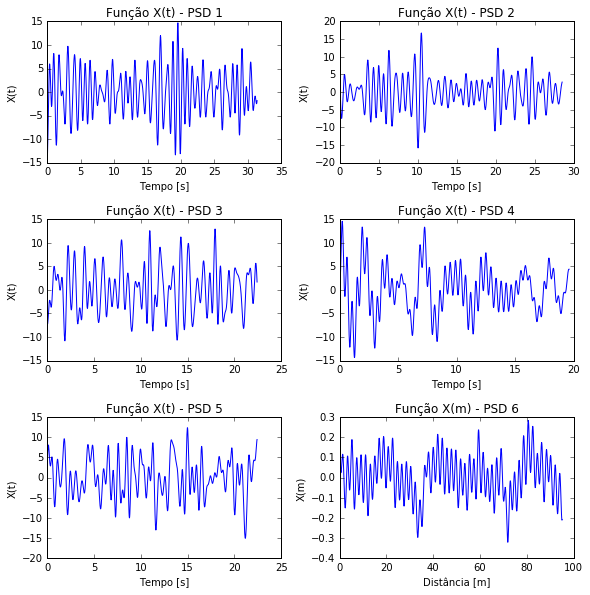

In [32]:
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.25)
   
   
xmax = 1000
ax1.plot(psds[0].time[:xmax],psds[0].X[:xmax])    
ax1.set_ylabel('X(t)')  
ax1.set_xlabel('Tempo [s]')  
ax1.set_title('Função X(t) - PSD 1')   

ax2.plot(psds[1].time[:xmax],psds[1].X[:xmax])    
ax2.set_ylabel('X(t)')  
ax2.set_xlabel('Tempo [s]')  
ax2.set_title('Função X(t) - PSD 2')   

ax3.plot(psds[2].time[:xmax],psds[2].X[:xmax])    
ax3.set_ylabel('X(t)')  
ax3.set_xlabel('Tempo [s]')  
ax3.set_title('Função X(t) - PSD 3')   

ax4.plot(psds[3].time[:xmax],psds[3].X[:xmax])    
ax4.set_ylabel('X(t)')  
ax4.set_xlabel('Tempo [s]')  
ax4.set_title('Função X(t) - PSD 4')   

ax5.plot(psds[4].time[:xmax],psds[4].X[:xmax])    
ax5.set_ylabel('X(t)')  
ax5.set_xlabel('Tempo [s]')  
ax5.set_title('Função X(t) - PSD 5')   

ax6.plot(psds[5].time[:xmax],psds[5].X[:xmax])    
ax6.set_ylabel('X(m)')  
ax6.set_xlabel('Distância [m]')  
ax6.set_title('Função X(m) - PSD 6')   

plt.show()
f.savefig("fig2.png", bbox_inches='tight')    

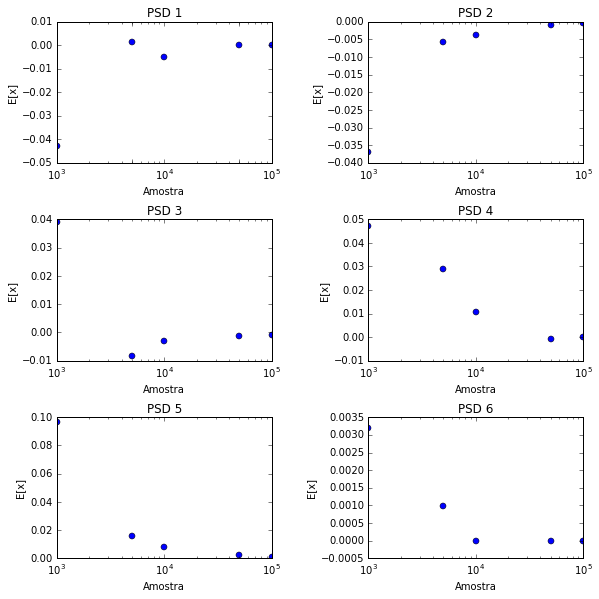

In [33]:
# questão 3
EX = []
EX2 = []
nplist = [1.0E3,5.0E3,1.0E4,5.0E4,1.0E5]
for psd in psds:
    ex = []
    ex2 = []
    for i in nplist:
        ex.extend([np.mean(psd.X[:int(i)])])
        ex2.extend([np.mean(np.array(psd.X[:int(i)])**2)])
        
    EX.append(ex)
    EX2.append(ex2)
 
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.45)

ax1.plot(nplist,EX[0],'o')    
ax1.set_ylabel('E[x]')  
ax1.set_xlabel('Amostra')  
ax1.set_title('PSD 1')   
ax1.set_xscale("log", nonposx='clip')
ax1.set_xticks(nplist)


ax2.plot(nplist,EX[1],'o')    
ax2.set_ylabel('E[x]')  
ax2.set_xlabel('Amostra')  
ax2.set_title('PSD 2')  
ax2.set_xticks(nplist)
ax2.set_xscale("log", nonposx='clip')

ax3.plot(nplist,EX[2],'o')    
ax3.set_ylabel('E[x]')  
ax3.set_xlabel('Amostra')  
ax3.set_title('PSD 3')  
ax3.set_xticks(nplist)
ax3.set_xscale("log", nonposx='clip')

ax4.plot(nplist,EX[3],'o')    
ax4.set_ylabel('E[x]')  
ax4.set_xlabel('Amostra')  
ax4.set_title('PSD 4')  
ax4.set_xticks(nplist)
ax4.set_xscale("log", nonposx='clip')

ax5.plot(nplist,EX[4],'o')    
ax5.set_ylabel('E[x]')  
ax5.set_xlabel('Amostra')  
ax5.set_title('PSD 5')
ax5.set_xticks(nplist)
ax5.set_xscale("log", nonposx='clip')

ax6.plot(nplist,EX[5],'o')    
ax6.set_ylabel('E[x]')  
ax6.set_xlabel('Amostra')  
ax6.set_title('PSD 6')  
ax6.set_xticks(nplist)
ax6.set_xscale("log", nonposx='clip')

plt.show()
f.savefig("fig3.png", bbox_inches='tight')    

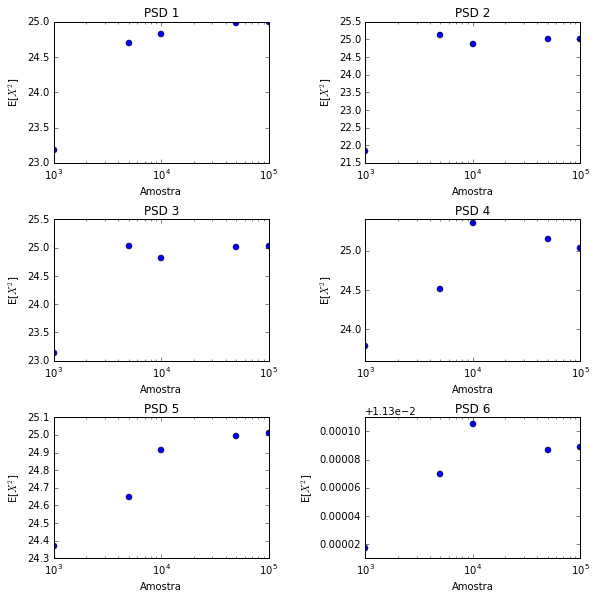

In [34]:
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.45)

ax1.plot(nplist,EX2[0],'o')    
ax1.set_ylabel('E[$X^2$]')  
ax1.set_xlabel('Amostra')  
ax1.set_title('PSD 1')   
ax1.set_xticks(nplist)
ax1.set_xscale("log", nonposx='clip')

ax2.plot(nplist,EX2[1],'o')    
ax2.set_ylabel('E[$X^2$]')  
ax2.set_xlabel('Amostra')  
ax2.set_title('PSD 2')  
ax2.set_xticks(nplist)
ax2.set_xscale("log", nonposx='clip')

ax3.plot(nplist,EX2[2],'o')    
ax3.set_ylabel('E[$X^2$]')  
ax3.set_xlabel('Amostra')  
ax3.set_title('PSD 3')  
ax3.set_xticks(nplist)
ax3.set_xscale("log", nonposx='clip')

ax4.plot(nplist,EX2[3],'o')    
ax4.set_ylabel('E[$X^2$]')  
ax4.set_xlabel('Amostra')  
ax4.set_title('PSD 4')  
ax4.set_xticks(nplist)
ax4.set_xscale("log", nonposx='clip')

ax5.plot(nplist,EX2[4],'o')    
ax5.set_ylabel('E[$X^2$]')  
ax5.set_xlabel('Amostra')  
ax5.set_title('PSD 5')
ax5.set_xticks(nplist)
ax5.set_xscale("log", nonposx='clip')

ax6.plot(nplist,EX2[5],'o')    
ax6.set_ylabel('E[$X^2$]')  
ax6.set_xlabel('Amostra')  
ax6.set_title('PSD 6')  
ax6.set_xticks(nplist)
ax6.set_xscale("log", nonposx='clip')

plt.show()
f.savefig("fig4.png", bbox_inches='tight')    

|psd 1 | E1 =  0.0000 |  E2 = 24.99584 |  E3 = -0.07273 |  E4 = 1810.14588 | coef. of variance = 525616.24 |Skewness = -0.000611 | Kurtosis = 2.897198 
 
|psd 2 | E1 = -0.0005 |  E2 = 25.01326 |  E3 = -0.02184 |  E4 = 1817.82267 | coef. of variance = -53758.26 |Skewness = 0.000105 | Kurtosis = 2.905433 
 
|psd 3 | E1 = -0.0008 |  E2 = 25.02069 |  E3 =  2.91950 |  E4 = 1779.71641 | coef. of variance = -31463.57 |Skewness = 0.023804 | Kurtosis = 2.842854 
 
|psd 4 | E1 = -0.0000 |  E2 = 25.02937 |  E3 =  0.00637 |  E4 = 1850.47970 | coef. of variance = -1707850.02 |Skewness = 0.000060 | Kurtosis = 2.953824 
 
|psd 5 | E1 =  0.0007 |  E2 = 25.01315 |  E3 =  0.34036 |  E4 = 1813.06971 | coef. of variance = 36027.94 |Skewness = 0.002304 | Kurtosis = 2.897860 
 
|psd 6 | E1 = -0.0000 |  E2 =  0.01139 |  E3 = -0.00000 |  E4 =  0.00033 | coef. of variance = -1220.06 |Skewness = -0.002497 | Kurtosis = 2.548253 
 


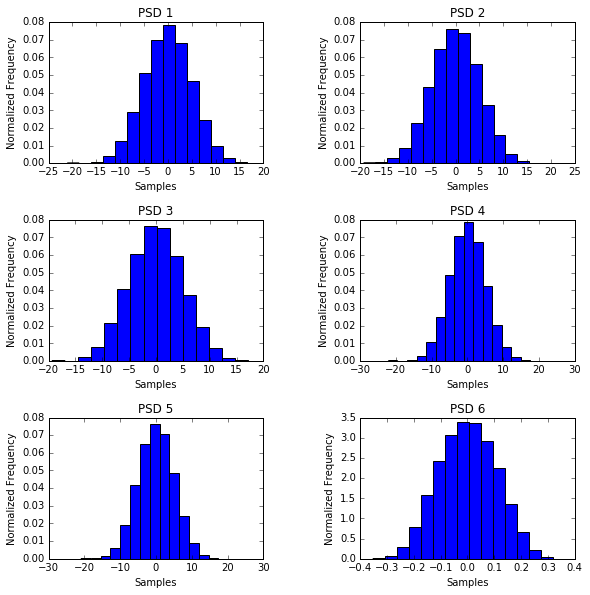

In [35]:
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.45)

nbins = int(1.0 + 1.33*np.log(len(psds[0].X)))

ax1.hist(psds[0].X,nbins,normed=True)    
ax1.set_ylabel('Normalized Frequency')  
ax1.set_xlabel('Samples')  
ax1.set_title('PSD 1')   

ax2.hist(psds[1].X,nbins,normed=True)    
ax2.set_ylabel('Normalized Frequency')  
ax2.set_xlabel('Samples')  
ax2.set_title('PSD 2')   

ax3.hist(psds[2].X,nbins,normed=True)    
ax3.set_ylabel('Normalized Frequency')  
ax3.set_xlabel('Samples')  
ax3.set_title('PSD 3')   

ax4.hist(psds[3].X,nbins,normed=True)    
ax4.set_ylabel('Normalized Frequency')  
ax4.set_xlabel('Samples')  
ax4.set_title('PSD 4')   

ax5.hist(psds[4].X,nbins,normed=True)    
ax5.set_ylabel('Normalized Frequency')  
ax5.set_xlabel('Samples')  
ax5.set_title('PSD 5')   

ax6.hist(psds[5].X,nbins,normed=True)    
ax6.set_ylabel('Normalized Frequency')  
ax6.set_xlabel('Samples')  
ax6.set_title('PSD 6')   

f.savefig("fig5.png", bbox_inches='tight')    
for psd in psds:
    print("|psd %i | E1 = %7.4f |  E2 = %8.5f |  E3 = %8.5f |  E4 = %8.5f | coef. of variance = %8.2f |Skewness = %f | Kurtosis = %f \n " %(psd.number,psd.E1,psd.E2,psd.E3,psd.E4,psd.cv,psd.skew,psd.kurt ))

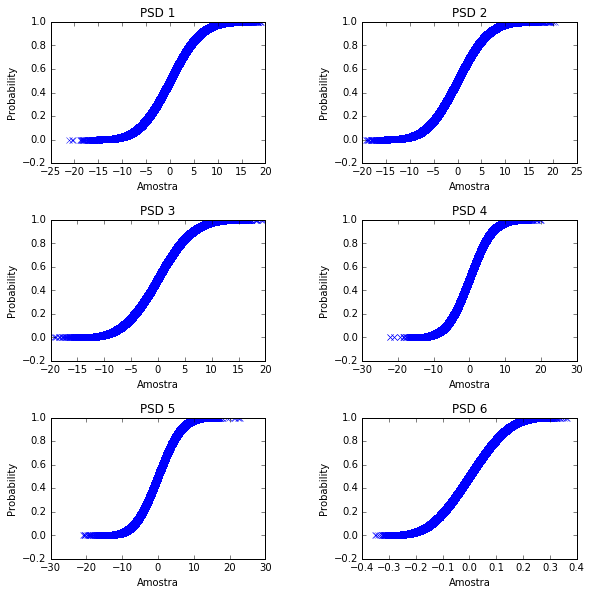

In [36]:
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.45)

nbins = 10

ax1.plot(psds[0].Xsort,psds[0].CDF,'x')    
ax1.set_ylabel('Probability')  
ax1.set_xlabel('Amostra')  
ax1.set_title('PSD 1')  


ax2.plot(psds[1].Xsort,psds[1].CDF,'x')    
ax2.set_ylabel('Probability')  
ax2.set_xlabel('Amostra')  
ax2.set_title('PSD 2')   

ax3.plot(psds[2].Xsort,psds[2].CDF,'x')    
ax3.set_ylabel('Probability')  
ax3.set_xlabel('Amostra')  
ax3.set_title('PSD 3')   

ax4.plot(psds[3].Xsort,psds[3].CDF,'x')    
ax4.set_ylabel('Probability')  
ax4.set_xlabel('Amostra')  
ax4.set_title('PSD 4')   

ax5.plot(psds[4].Xsort,psds[4].CDF,'x')    
ax5.set_ylabel('Probability')  
ax5.set_xlabel('Amostra')  
ax5.set_title('PSD 5')   

ax6.plot(psds[5].Xsort,psds[5].CDF,'x')    
ax6.set_ylabel('Probability')  
ax6.set_xlabel('Amostra')  
ax6.set_title('PSD 6')   
f.savefig("fig6.png", bbox_inches='tight')    

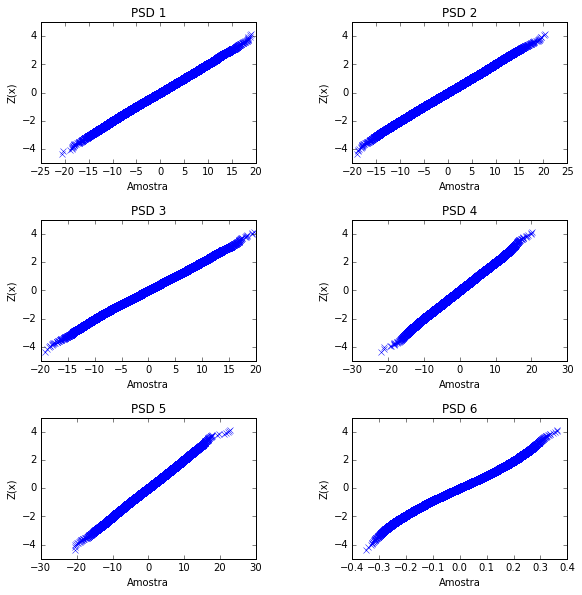

In [37]:
f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2,figsize=(8,8),dpi= 80)
f.tight_layout()
plt.subplots_adjust(hspace = 0.4, wspace = 0.45)

nbins = 10

ax1.plot(psds[0].Xsort,ndtri(np.array(psds[0].CDF)),'x')    
ax1.set_ylabel('Z(x)')  
ax1.set_xlabel('Amostra')  
ax1.set_title('PSD 1')  


ax2.plot(psds[1].Xsort,ndtri(np.array(psds[1].CDF)),'x')    
ax2.set_ylabel('Z(x)')  
ax2.set_xlabel('Amostra')  
ax2.set_title('PSD 2')   

ax3.plot(psds[2].Xsort,ndtri(np.array(psds[2].CDF)),'x')    
ax3.set_ylabel('Z(x)')  
ax3.set_xlabel('Amostra')  
ax3.set_title('PSD 3')   

ax4.plot(psds[3].Xsort,ndtri(np.array(psds[3].CDF)),'x')    
ax4.set_ylabel('Z(x)')  
ax4.set_xlabel('Amostra')  
ax4.set_title('PSD 4')   

ax5.plot(psds[4].Xsort,ndtri(np.array(psds[4].CDF)),'x')    
ax5.set_ylabel('Z(x)')  
ax5.set_xlabel('Amostra')  
ax5.set_title('PSD 5')   

ax6.plot(psds[5].Xsort,ndtri(np.array(psds[5].CDF)),'x')    
ax6.set_ylabel('Z(x)')  
ax6.set_xlabel('Amostra')  
ax6.set_title('PSD 6')   
f.savefig("fig7.png", bbox_inches='tight')    

In [38]:
# teste t

# sp.stats.f.isf(prop,df1,df2) equal to excel =INV.F.CD(prop,df1,df2)
# sp.stats.f.sf(Fval,df1,df2) equal to excel = DIST.F.CD(Fval,df1,df2)

def testF(X1,X2,alpha):
    ''' This is the test-F for verify if the variance are equal
    H0 - var(X1) = var(X2)
    H1 - var(X1) != var(X2)
    alpha is the significance level
    '''
    df1 = len(X1) - 1.0
    df2 = len(X2) - 1.0
    
    varX1 = np.var(X1)
    varX2 = np.var(X2)
    
    if varX1>varX2:
        F = varX1/varX2
    else: 
        F = varX2/varX1

    Fcrit = stats.f.isf(alpha,df1,df2)
    Fcritsup = stats.f.isf(alpha/2.0,df1,df2)
    Fcritinf = stats.f.isf(1 - alpha/2.0,df1,df2)
    
    P = stats.f.sf(F,df1,df2) #P(F<=f)
        
    if F<=Fcrit or F>=Fcritinf or F<=Fcritinf:
        print("H0 is true")
        print("F calc = %f" %F)
        print("F crit one tail = %f" %Fcrit)
        print("F crit two tails = %f <= %f <= %f " %(Fcritinf,F,Fcritsup) )
        print("P(F<=f) = %f" %P)
        return True
    else:
        print("H0 is false")
        print("F calc = %f" %F)
        print("F crit one tail = %f" %Fcrit)
        print("P(F<=f) = %f" %P)
        print("F crit two tails = %f < %f or %f > %f " %(F,Fcritinf,F,Fcritsup) )
        return False

sampleA = 0   # psd index
sampleB = 5 # psd index
alpha = 0.05 # significance level    

print("Peforming test on PSD %i and PSD %i \n" %(sampleA+1,sampleB+1))
print("H0: Average are equal")
print("H1: Average are not equal")
t, pvalue = stats.ttest_ind(psds[sampleA].X,psds[sampleB].X)
if pvalue>alpha:
    print("H0 is true for the average test. The average from sample 1 and 2 are equal")
    print("p-value = %f" %pvalue)
    print("t = %f" %t)
else:    
    print("H0 is false for the average test. The average from sample 1 and 2 are different")
    print("p-value = %f" %pvalue)
    print("t = %f" %t)
    
print("\n")
print("H0: Variance are equal")
print("H1: Variance are not equal")

test = testF(psds[sampleA].X,psds[sampleB].X,alpha)


Peforming test on PSD 1 and PSD 6 

H0: Average are equal
H1: Average are not equal
H0 is true for the average test. The average from sample 1 and 2 are equal
p-value = 0.997130
t = 0.003597


H0: Variance are equal
H1: Variance are not equal
H0 is true
F calc = 2194.811219
F crit one tail = 1.010457
F crit two tails = 0.987680 <= 2194.811219 <= 1.012473 
P(F<=f) = 0.000000
